<a href="https://colab.research.google.com/github/vishal12345eng/vishal/blob/main/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd


In [3]:
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
advertising = pd.DataFrame(pd.read_csv("/content/SLR_Salary_dataset (1).csv"))
advertising.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [8]:
advertising.shape

(30, 3)

In [9]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [10]:
advertising.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [11]:
advertising.isnull().sum()*100/advertising.shape[0]

,0
Unnamed: 0,0.0
YearsExperience,0.0
Salary,0.0


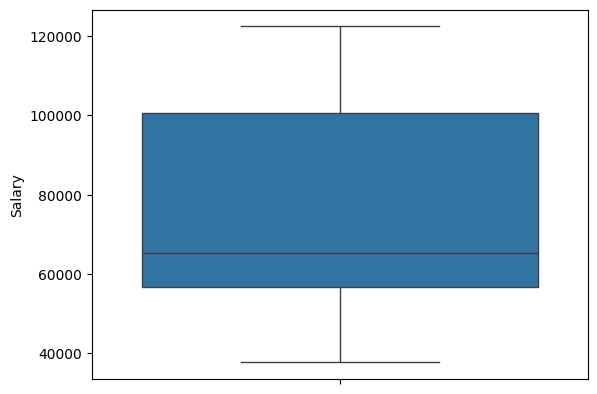

In [18]:
sns.boxplot(advertising['Salary'])
plt.show()


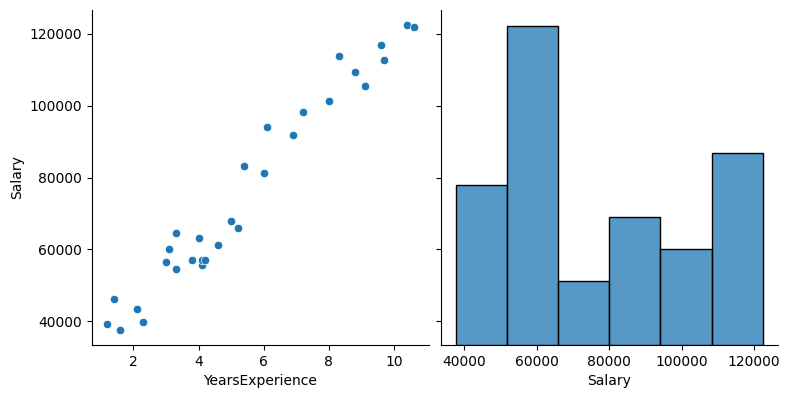

In [19]:
sns.pairplot(advertising, x_vars=['YearsExperience', 'Salary'], y_vars='Salary', height=4, aspect=1, kind='scatter')
plt.show()


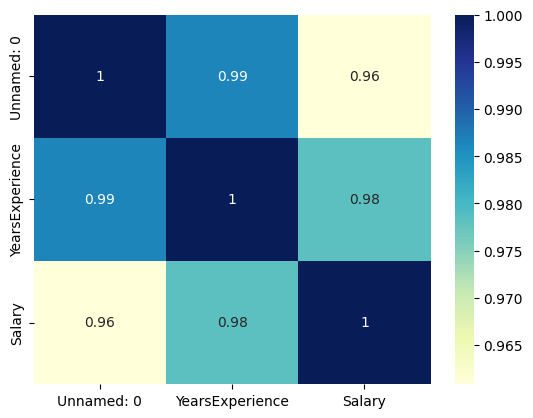

In [20]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [21]:
X = advertising['YearsExperience']
y = advertising['Salary']


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [23]:
X_train.head()


,YearsExperience
17,5.4
22,8.0
11,4.1
4,2.3
29,10.6


In [24]:
y_train.head()



,Salary
17,83089.0
22,101303.0
11,55795.0
4,39892.0
29,121873.0


In [25]:
import statsmodels.api as sm

In [26]:
X_train_sm = sm.add_constant(X_train)


In [27]:
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params



,0
const,24230.767402
YearsExperience,9731.203838


In [28]:
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           9.91e-14
Time:                        05:07:06   Log-Likelihood:                -211.80
No. Observations:                  21   AIC:                             427.6
Df Residuals:                      19   BIC:                             429.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.423e+04   2921.388     

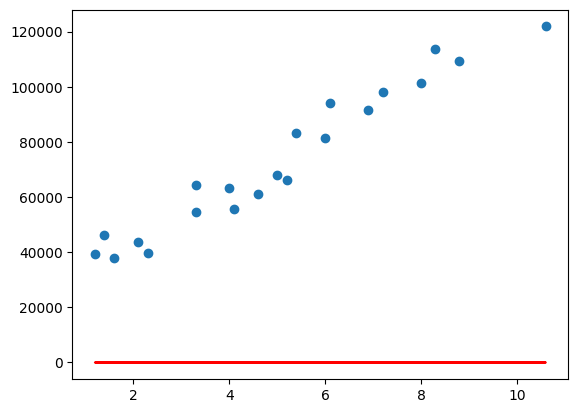

In [29]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()



In [30]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)


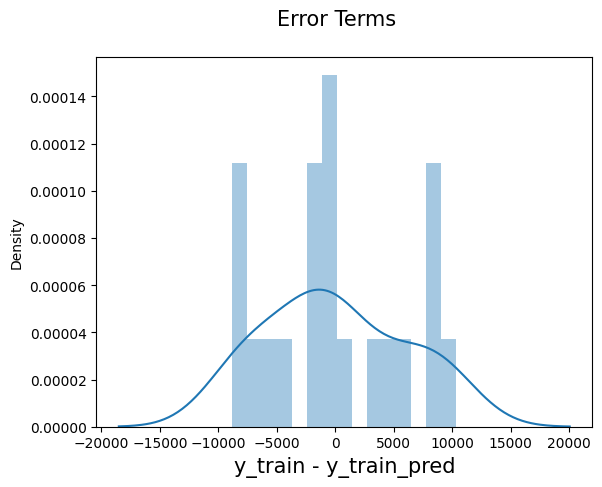

In [31]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

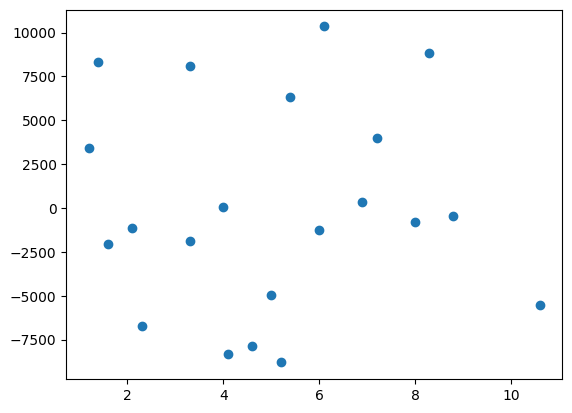

In [32]:
plt.scatter(X_train,res)
plt.show()

In [33]:

X_test_sm = sm.add_constant(X_test)

In [34]:
y_pred = lr.predict(X_test_sm)
y_pred.head()

,0
9,61209.341988
26,117650.324249
28,125435.287320
13,65101.823523
5,53424.378917


In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [36]:
np.sqrt(mean_squared_error(y_test, y_pred))

5505.479002176148

In [37]:
r_squared = r2_score(y_test, y_pred)
r_squared


0.9627668685473266

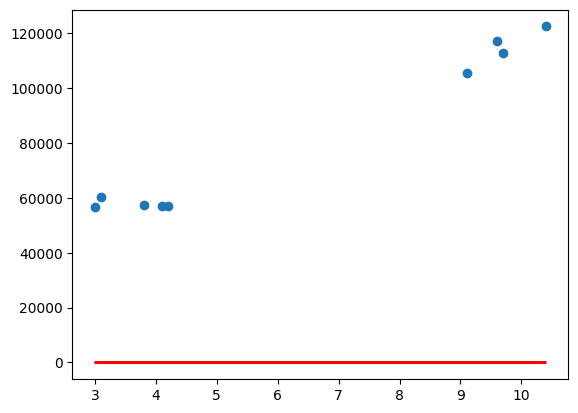

In [38]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()